<a href="https://colab.research.google.com/github/corrine1106/Project_EDA/blob/master/%EF%BC%B73_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2021-12-10 07:02:02--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.103.102, 142.250.103.138, 142.250.103.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.103.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dtb5g5opb7hlk9s14a1erkn69lomtv26/1639119675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-10 07:02:06--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dtb5g5opb7hlk9s14a1erkn69lomtv26/1639119675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.197.132, 2607:f8b0:4001:c1b::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/T大使/data3_project (1).csv')

In [4]:
def transfer_revernue(row):
  if (row['Quantity'] < 0) & (row['UnitPrice']<0):
    return row['Quantity']*-row['UnitPrice']
  else:
    return row['Quantity']*row['UnitPrice']

df['Revenue'] = df.apply(transfer_revernue,axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.0,2019-01-01,1259.0,9.100002e+12,中區,2019-12-09,2018-06-24,10072.0
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.0,2019-01-01,839.0,9.100003e+12,中區,2018-10-21,2018-10-21,6712.0
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.0,2019-01-01,839.0,9.100003e+12,中區,2018-10-21,2018-10-21,6712.0
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.0,2019-01-01,-1501.0,9.100003e+12,中區,2018-10-21,2018-10-21,-12008.0
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.0,2019-01-01,672.0,9.100003e+12,南區,2018-12-04,2018-12-04,5376.0


In [9]:
# 1.每個區域的收入分佈圖
area_group = df.groupby('Country')['Revenue'].sum().reset_index()
area_group['Country'] = area_group['Country'].astype(str)

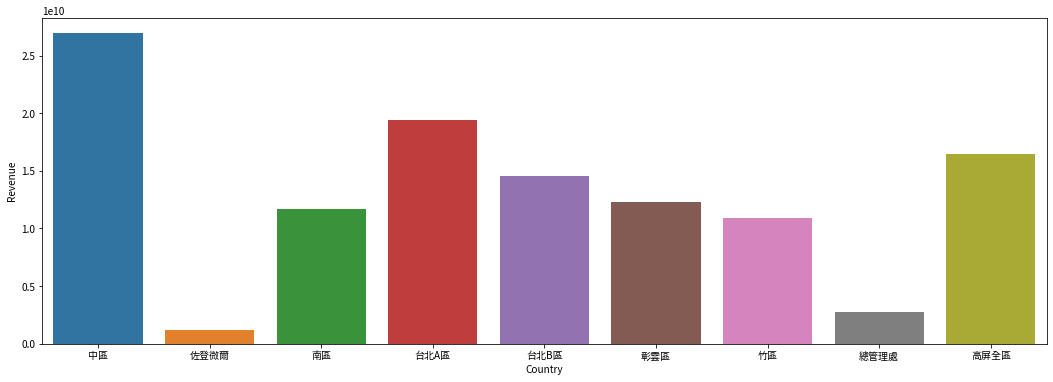

In [22]:
figure,axis = plt.subplots(figsize=(18,6))
sns.barplot(ax=axis, x='Country', y='Revenue',data=area_group)
plt.show()

In [60]:
# 2.銷售最好的在每個地區的收入分佈
# 銷售最好＝數量最多
best_goods = df.groupby('StockCode')['Quantity'].sum().idxmax()
goods_selected = df.loc[df['StockCode'] == best_goods]

In [58]:
goods_selected

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
10,PS5262016032,HB90A01,全背順氣活力SPA課程單堂,96.0,2019-01-01,11559.0,9.100000e+12,竹區,2007-01-02,2012-07-28,1109664.0
91,PS5411021544,HB90A01,全背順氣活力SPA課程單堂,8.0,2019-01-01,758.0,9.100003e+12,南區,NaN,2019-01-01,6064.0
110,PS5339002587,HB90A01,全背順氣活力SPA課程單堂,40.0,2019-01-01,6259.0,9.100002e+12,中區,2013-03-12,2013-02-19,250360.0
113,PS5339002587,HB90A01,全背順氣活力SPA課程單堂,8.0,2019-01-01,758.0,9.100002e+12,中區,2013-03-12,2013-02-19,6064.0
121,PS5454014871,HB90A01,全背順氣活力SPA課程單堂,88.0,2019-01-01,11559.0,9.100001e+12,南區,2011-08-17,2012-11-16,1017192.0
...,...,...,...,...,...,...,...,...,...,...,...
1403770,PS5455008980,HB90A01,全背順氣活力SPA課程單堂,8.0,2020-12-31,809.0,9.100003e+12,南區,NaN,2020-12-31,6472.0
1404004,PS5325021108,HB90A01,全背順氣活力SPA課程單堂,40.0,2020-12-31,6501.0,9.100003e+12,中區,2020-12-31,2020-12-31,260040.0
1404006,PS5325021108,HB90A01,全背順氣活力SPA課程單堂,8.0,2020-12-31,558.0,9.100003e+12,中區,2020-12-31,2020-12-31,4464.0
1404025,PS5440020366,HB90A01,全背順氣活力SPA課程單堂,8.0,2020-12-31,558.0,9.100003e+12,南區,NaN,2020-12-31,4464.0


In [42]:
selected_group = goods_selected.groupby('Country')['Revenue'].sum().reset_index()
selected_group['Country'] = selected_group['Country'].astype(str)

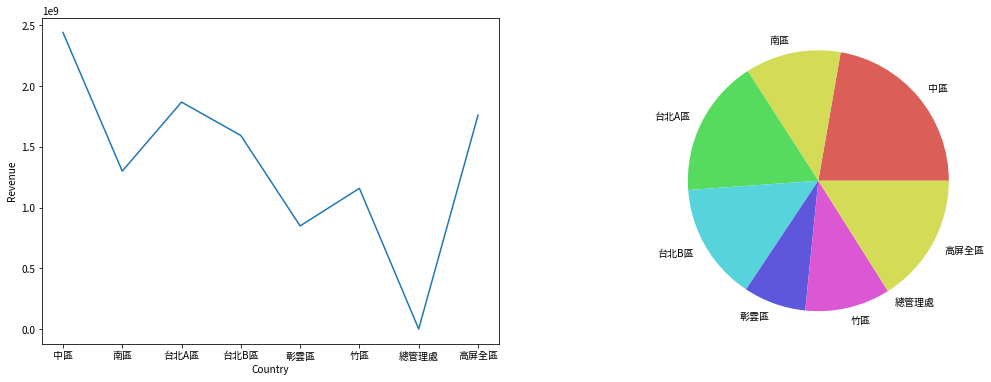

In [47]:
figure,axis = plt.subplots(1,2,figsize=(18,6))
sns.lineplot(ax=axis[0], x='Country', y='Revenue',data=selected_group)
hls_default_palette = sns.hls_palette()
plt.pie(selected_group['Revenue'], labels = selected_group['Country'], colors = hls_default_palette) 
plt.show()

In [98]:
# 3.每個季節購買的人數與收入（折線圖）
season = {3:'春',4:'春',5:'春',6:'夏',7:'夏',8:'夏',9:'秋',10:'秋',11:'秋',12:'冬',1:'冬',2:'冬'}
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['season'] = df['InvoiceDate'].apply(lambda date: season[date.month])
season_group = df.groupby('season')['Revenue'].sum().reset_index()
season_group.set_index('season',inplace=True)
season_group['Number'] = df.groupby('season')['InvoiceNo'].nunique()

In [99]:
season_group['Revenue'] = season_group['Revenue']/100000

In [100]:
season_group

,Revenue,Number
season,,
冬,288324.08464,134749
夏,287949.72824,159982
春,289823.66792,167744
秋,296168.17544,154010


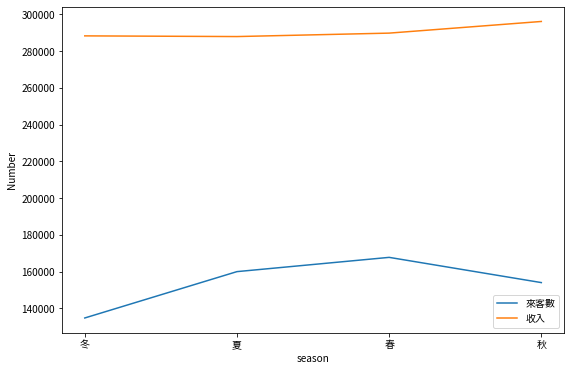

In [104]:
figure,axis = plt.subplots(figsize=(9,6))
sns.lineplot(ax=axis, x='season', y='Number',data=season_group,label='來客數')
sns.lineplot(ax=axis, x='season', y='Revenue',data=season_group, label='收入') 
axis.legend()
plt.show()